The purpose of this notebook is to perform multivariate visualization and summary statistical analysis on the Kaggle King County dataset and find factors that influence price per square foot of the houses.

The function, read.kc_house, reads the csv file containing housing data into a data frame and removes incomplete/missing values.

In [34]:
##The function, read.kc_house, reads the csv file containing housing data into a data frame and removes incomplete/missing values.
read.kc_house = function(file = 'kc_house_data.csv'){
  ## Read the csv file
  kc_house <- read.csv(file, header = TRUE, 
                                stringsAsFactors = FALSE)
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  kc_house[complete.cases(kc_house), ]
}
kc_house = read.kc_house()

str function gives the structure of the dataframe. There are 21613 observations with 21 variables.

In [32]:
str(kc_house)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

In [35]:
##calculate price per sq ft and log(price) per sq ft and add them to the data frame
price_persqft = kc_house$price/kc_house$sqft_living15
kc_house$price_sqft = price_persqft
kc_house$price_log = (log(kc_house$price))/kc_house$sqft_living15

In [17]:
summary(kc_house)

       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

The median value of houses in King county is $450,000. There is not much difference between the mean and median in the price of houses. So only a few houses are priced > $500,000.The number of rooms can be as large as 34 but the bathrooms reach a maximum at 8.

In [15]:
head(kc_house, n = 10)
tail(kc_house, n = 10)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,165.59701
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,318.34320
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,66.17647
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,444.11765
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,283.33333
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,257.35294
1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,115.05809
2008000270,20150115T000000,291850,3,1.50,1060,9711,1,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,176.87879
2414600126,20150415T000000,229500,3,1.00,1780,7470,1,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,128.93258
3793500160,20150312T000000,323000,3,2.50,1890,6560,2,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,135.14644


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft
21604,7852140040,20140825T000000,507250,3,2.50,2270,5536,2,0,0,...,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,223.4581
21605,9834201367,20150126T000000,429000,3,2.00,1490,1126,3,0,0,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,306.4286
21606,3448900210,20141014T000000,610685,4,2.50,2520,6023,2,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,242.3353
21607,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,491.4634
21608,2997800021,20150219T000000,475000,3,2.50,1310,1294,2,0,0,...,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,357.1429
21609,263000018,20140521T000000,360000,3,2.50,1530,1131,3,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,235.2941
21610,6600060120,20150223T000000,400000,4,2.50,2310,5813,2,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,218.5792
21611,1523300141,20140623T000000,402101,2,0.75,1020,1350,2,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,394.2167
21612,291310100,20150116T000000,400000,3,2.50,1600,2388,2,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,283.6879
21613,1523300157,20141015T000000,325000,2,0.75,1020,1076,2,0,0,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,318.6275


Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

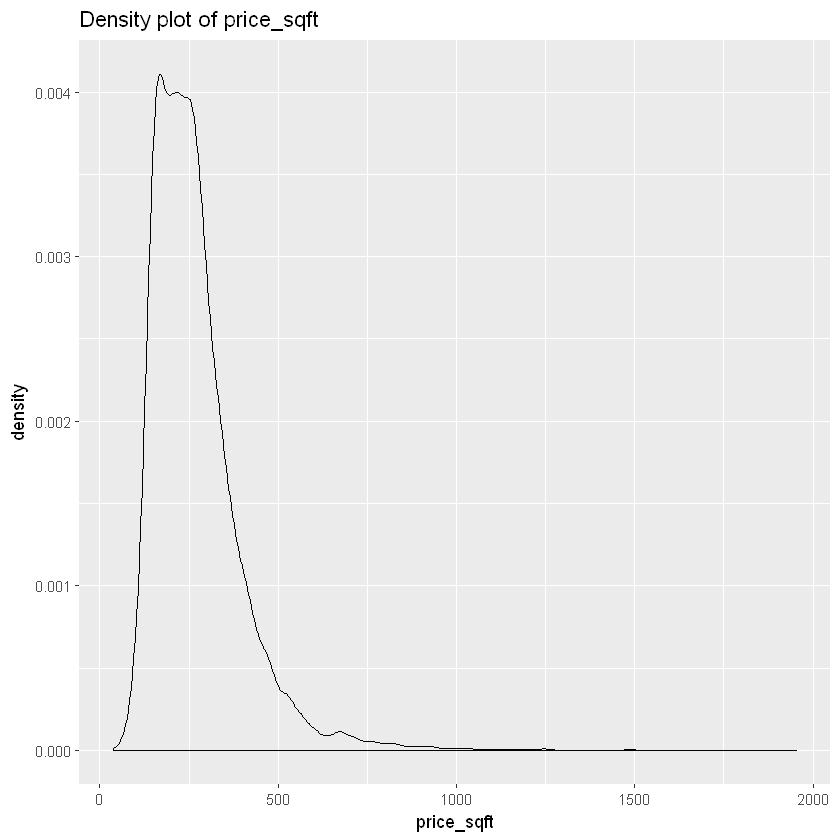

In [7]:
require(ggplot2)
ggplot(kc_house, aes(price_sqft)) + geom_density()+ggtitle("Density plot of price_sqft")

Price per square foot is clustered around 250 which mean and median values from the summary show as well.

In [16]:
cor_kc_house <- cor(kc_house[,3:22])
print(cor_kc_house)

                    price     bedrooms   bathrooms sqft_living     sqft_lot
price          1.00000000  0.308349598  0.52513751  0.70203505  0.089660861
bedrooms       0.30834960  1.000000000  0.51588364  0.57667069  0.031703243
bathrooms      0.52513751  0.515883638  1.00000000  0.75466528  0.087739662
sqft_living    0.70203505  0.576670693  0.75466528  1.00000000  0.172825661
sqft_lot       0.08966086  0.031703243  0.08773966  0.17282566  1.000000000
floors         0.25679389  0.175428935  0.50065317  0.35394929 -0.005200991
waterfront     0.26636943 -0.006582479  0.06374363  0.10381782  0.021603683
view           0.39729349  0.079531852  0.18773702  0.28461119  0.074710106
condition      0.03636179  0.028472104 -0.12498193 -0.05875259 -0.008958250
grade          0.66743426  0.356966725  0.66498253  0.76270448  0.113621124
sqft_above     0.60556730  0.477600161  0.68534248  0.87659660  0.183512281
sqft_basement  0.32381602  0.303093375  0.28377003  0.43504297  0.015286202
yr_built    

Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], 

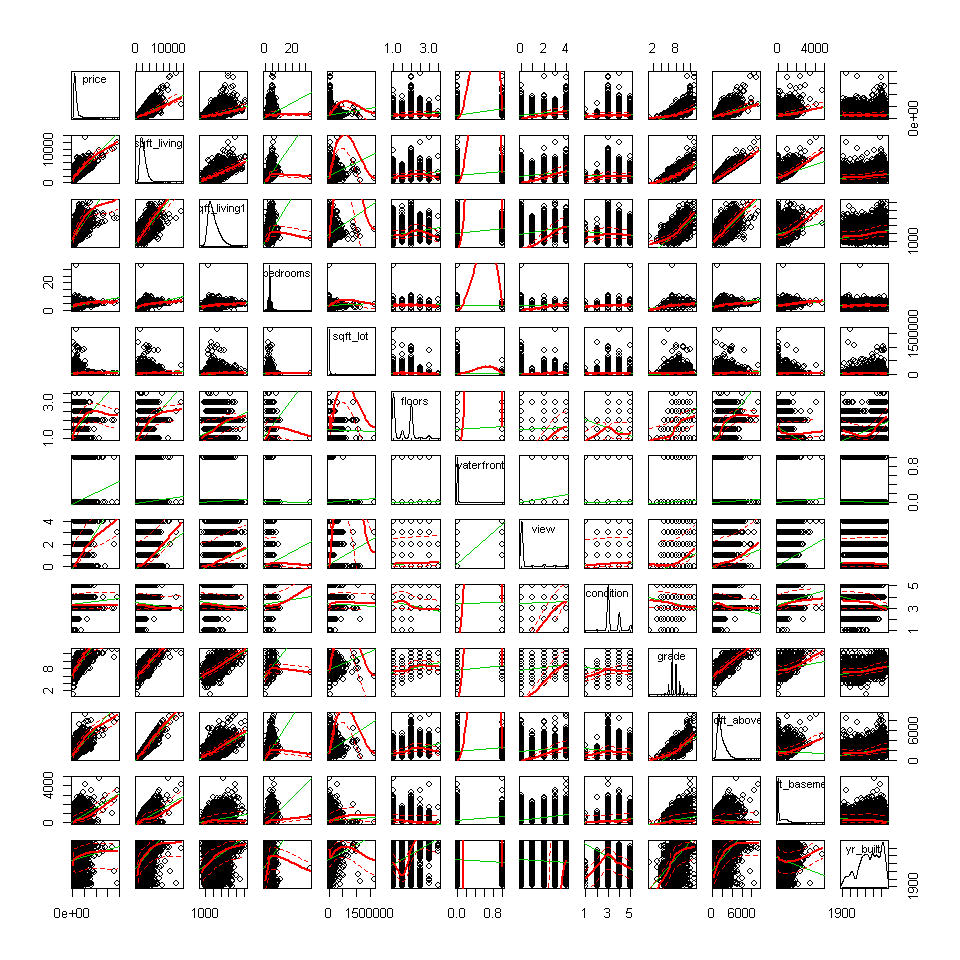

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
require(car)
scatterplotMatrix(~ price + sqft_living + sqft_living15+bedrooms+sqft_lot+floors
                  + waterfront+view+condition+grade+sqft_above+sqft_basement +yr_built, data = kc_house)

The above pearson correlation plot between the price and some of the variables shows that the price increases with 
square foot living area.


The houses are densely clustered with price per square foot < 500 and sqft_living between 1000 and 4000.

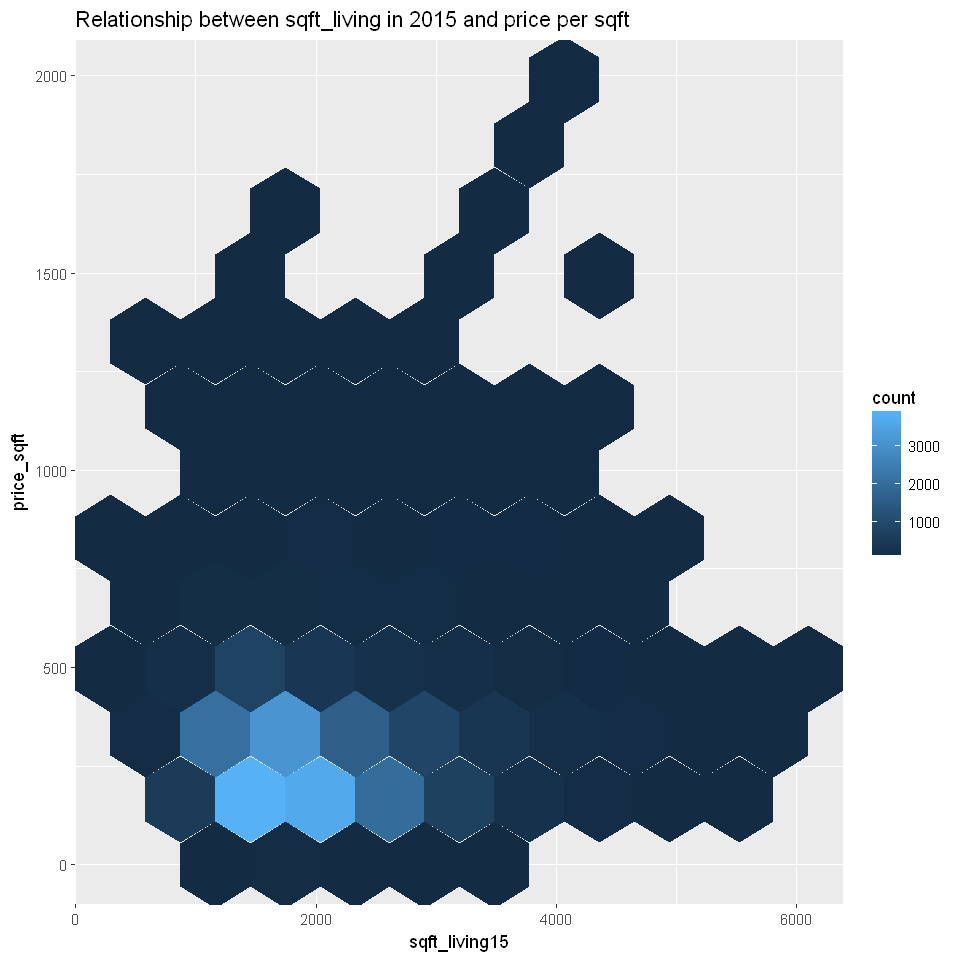

In [23]:
ggplot(kc_house, aes(sqft_living15, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('sqft_living15') + ylab('price_sqft') +
    ggtitle('Relationship between sqft_living in 2015 and price per sqft')

Majority of the houses have price per sqft < 500 and sqft living area around 2000.

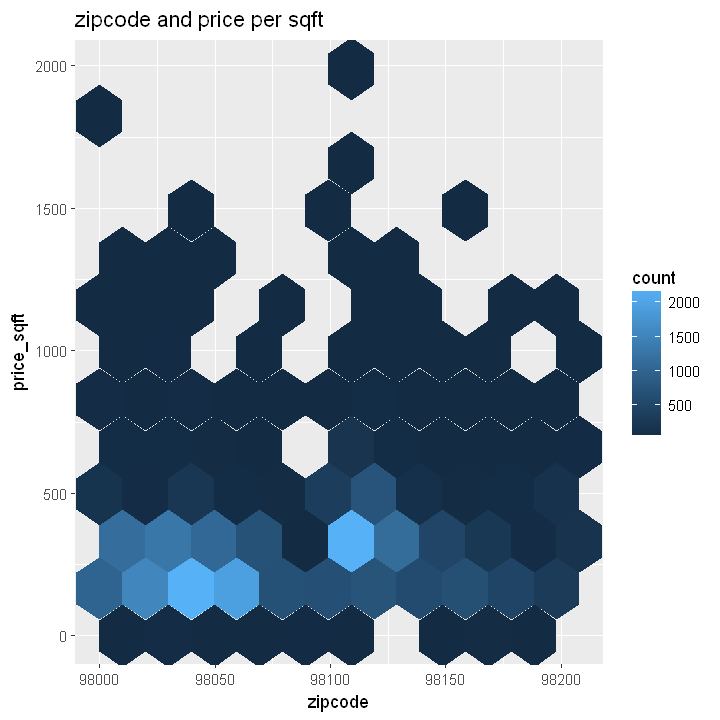

In [32]:
ggplot(kc_house, aes(zipcode, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('zipcode') + ylab('price_sqft') +
    ggtitle('zipcode and price per sqft')

Houses are densely clustered with price per square foot around 250 in zipcodes 98000-98050.

Warning message:
"package 'hexbin' was built under R version 3.4.3"

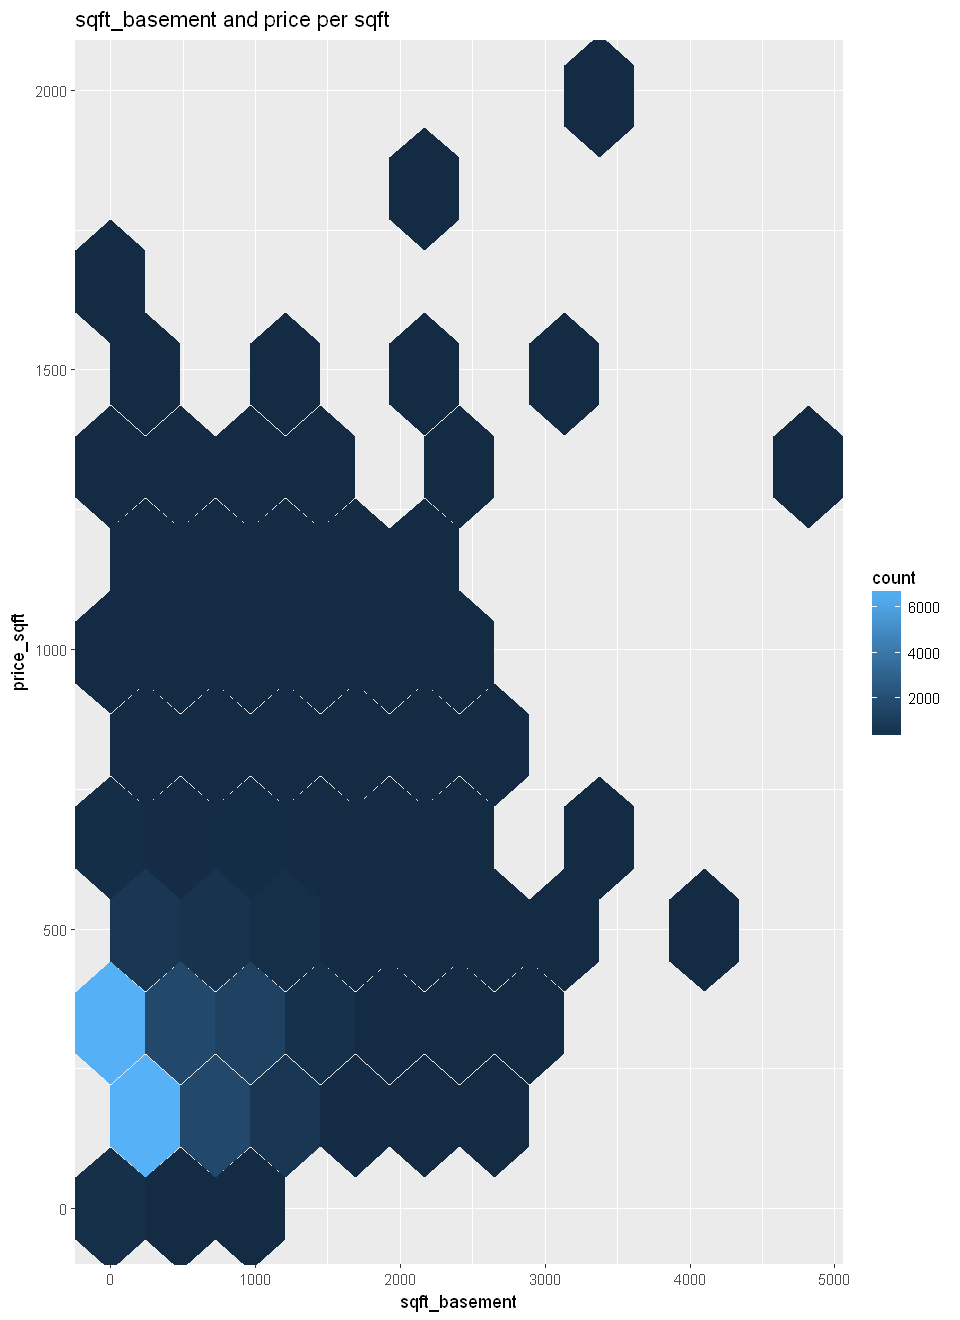

In [65]:
ggplot(kc_house, aes(sqft_basement, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('sqft_basement') + ylab('price_sqft') +
    ggtitle('sqft_basement and price per sqft')

Most of the houses do not have a basement. A few of the more expensive houses have a basement.

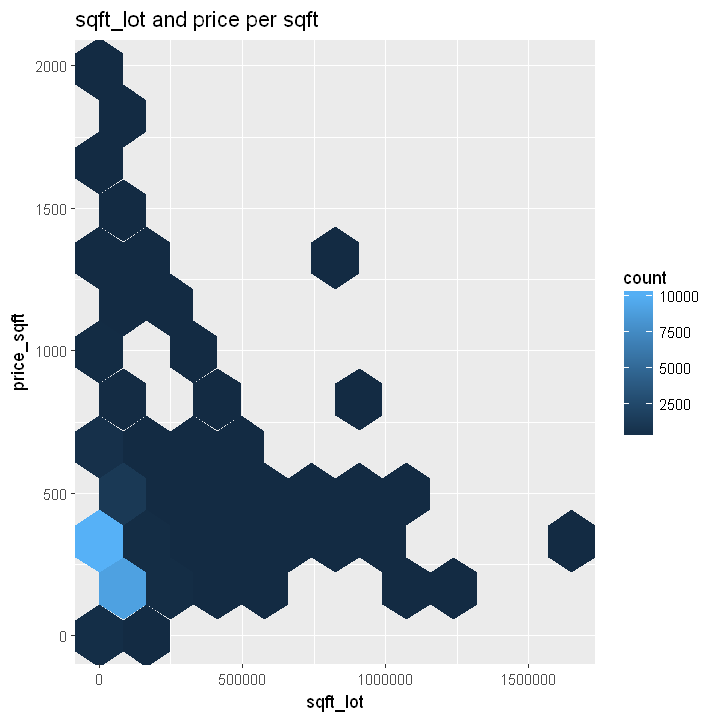

In [44]:
ggplot(kc_house, aes(sqft_lot, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('sqft_lot') + ylab('price_sqft') +
    ggtitle('sqft_lot and price per sqft')

A majority of the houses have a small lot size. Surprisingly, the more expensive houses have a small lot size as well.

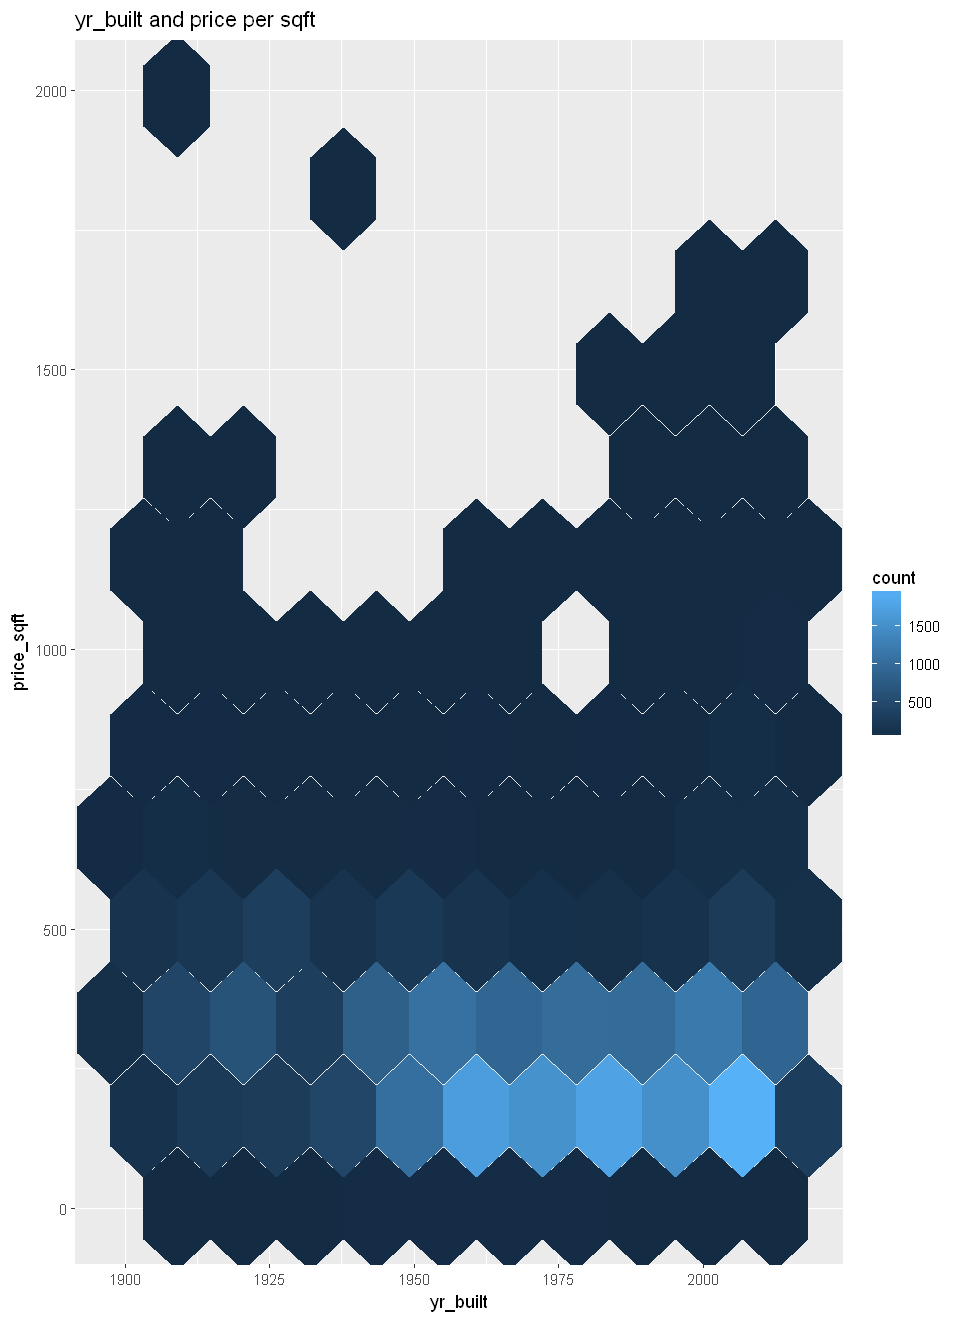

In [67]:
ggplot(kc_house, aes(yr_built, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('yr_built') + ylab('price_sqft') +
    ggtitle('yr_built and price per sqft')

Many of the houses were built between 1960 - 2000. The most expensive house was built around 1900. A few of the newer homes 
are also expensive.

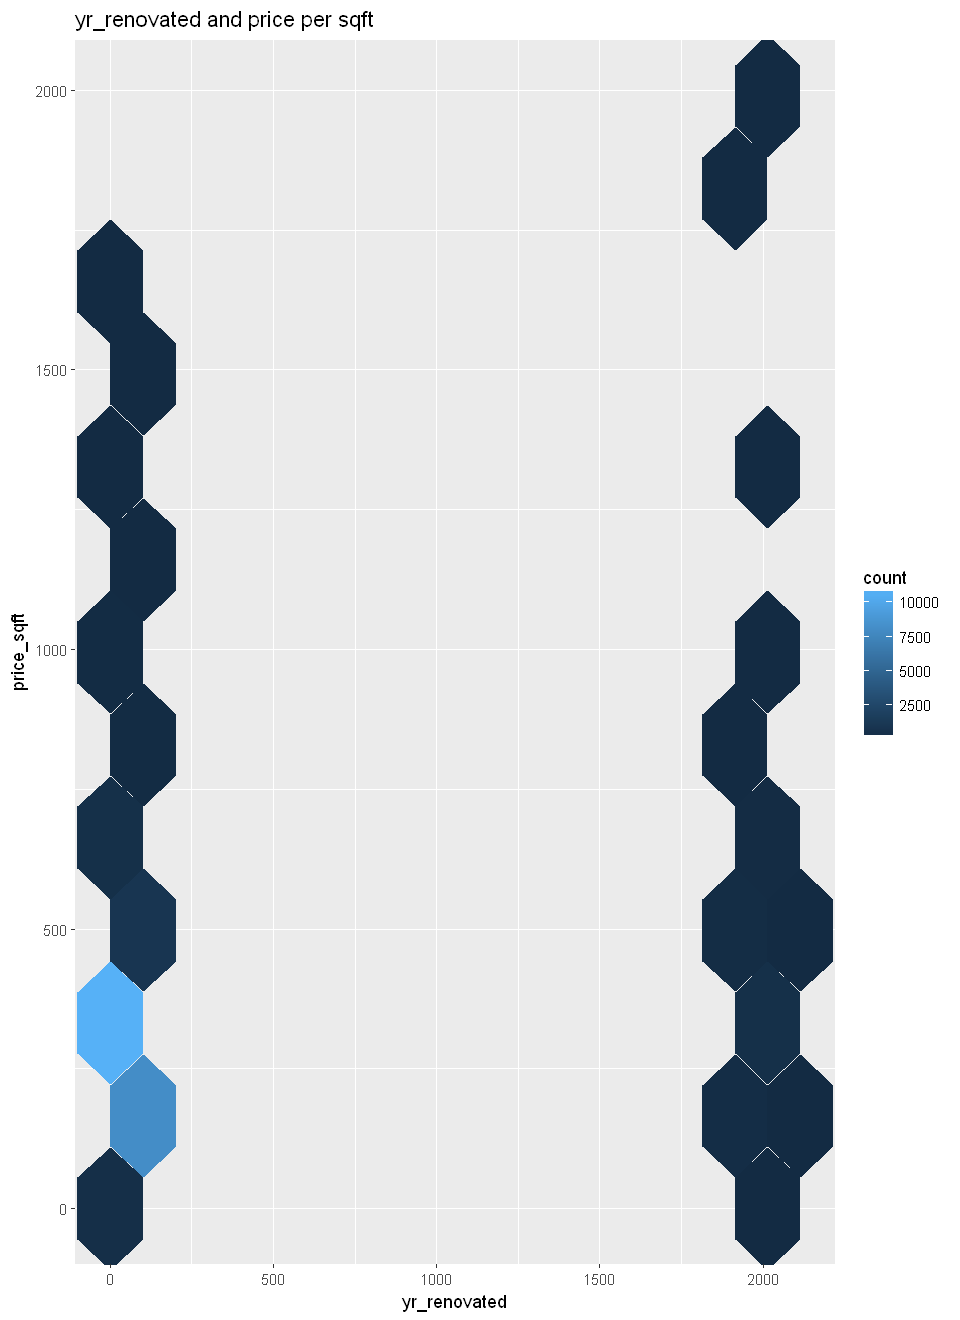

In [68]:
ggplot(kc_house, aes(yr_renovated, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('yr_renovated') + ylab('price_sqft') +
    ggtitle('yr_renovated and price per sqft')

A majority of the houses have not been renovated. The most expensive (and the oldest from the previous figure) house has
been renovated.

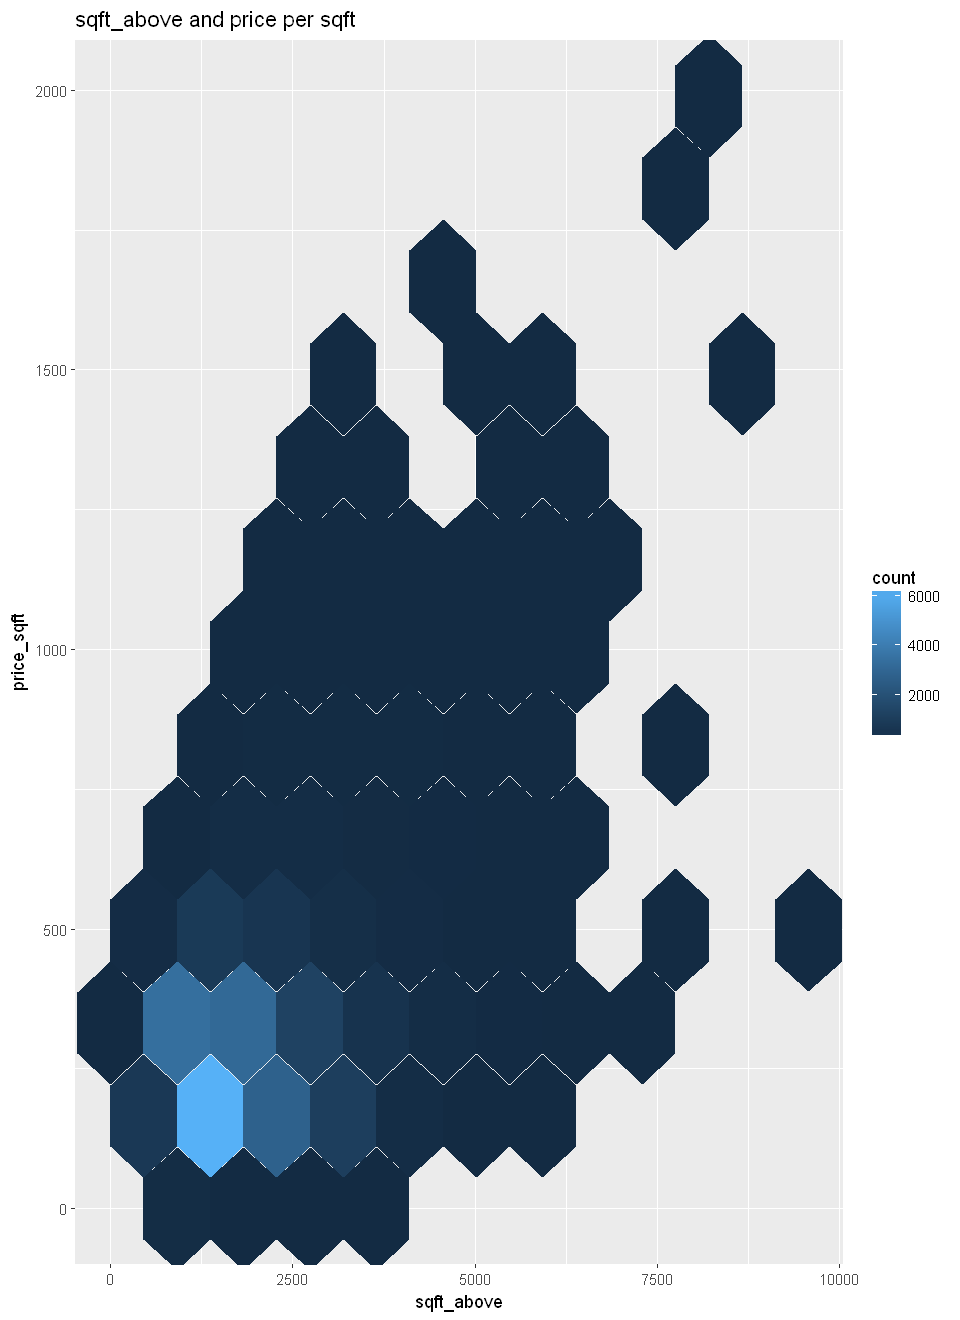

In [72]:
ggplot(kc_house, aes(sqft_above, price_sqft)) + 
    stat_binhex(bins = 10) +
    xlab('sqft_above') + ylab('price_sqft') +
    ggtitle('sqft_above and price per sqft')

The house with the greatest sqft_above (10,000) is not the most expensive. But the expensive houses do have sqft-above >7500.

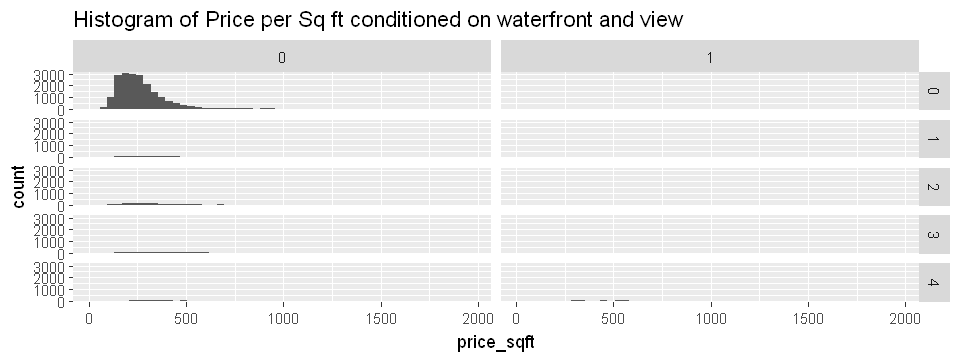

In [36]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)
bw1 = (max(kc_house$price_sqft) - min(kc_house$price_sqft))/51
ggplot(kc_house, aes(price_sqft)) + 
        geom_histogram(binwidth = bw1) + 
        facet_grid(view ~ waterfront) +
        ggtitle('Histogram of Price per Sq ft conditioned on waterfront and view')

Majority of the houses are not waterfront property. Only a few houses have a view. The most expensive house does not have a view nor do they have a waterfront.

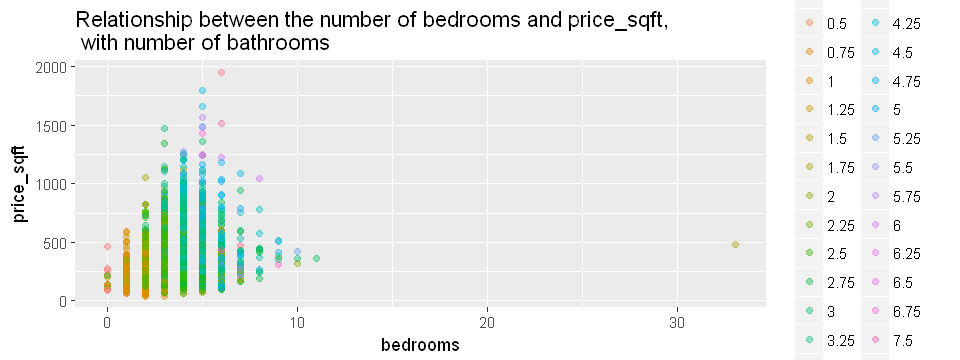

In [41]:
ggplot(kc_house, aes(bedrooms, price_sqft)) + geom_point(aes(color = factor(bathrooms)), alpha = 0.4) + 
    xlab('bedrooms') + ylab('price_sqft') + 
    ggtitle('Relationship between the number of bedrooms and price_sqft, \n with number of bathrooms')

The most expensive houses have nearly 1:1 bedroom to bathroom ratio.

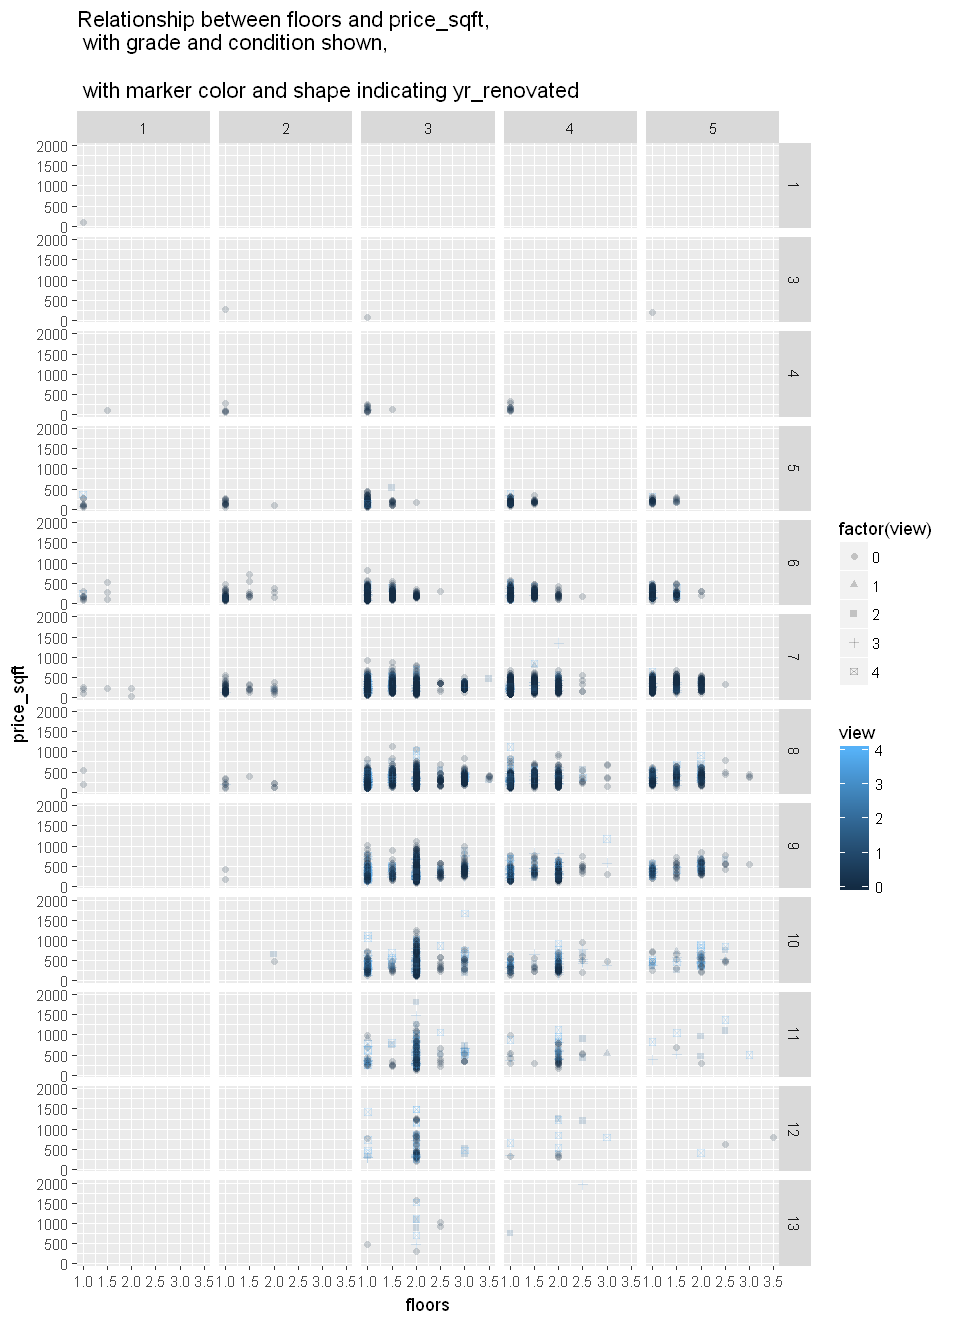

In [81]:
options(repr.plot.width=8, repr.plot.height=11)
library(RColorBrewer)
ggplot(kc_house, aes(floors, price_sqft)) + geom_point(aes(color = view, shape = factor(view)), alpha = 0.2) + 
    facet_grid(grade ~ condition) +
    xlab('floors') + ylab('price_sqft') + 
    ggtitle('Relationship between floors and price_sqft, \n with grade and condition shown, 
              \n with marker color and shape indicating yr_renovated')

Majority of the houses have 2 floors. There are very few houses with condition 1 - 4. Cheaper houses have a low grade and condition.
Most of the houses have grades 3 and 4 with condition 7-10. The more expensive houses have a view with condition 10 or 11 
grade 4 or 5.

Summary
1. Houses are densely clustered with price per square foot around 250 in zipcodes 98000-98050.
2. The more expensive houses have a ~1:1 bathroom to bedroom ratio; have a view with grade 4-5 and condition 10-11. The most 
expensive house was built in 1900 and renovated around 2000.
3. The price per square foot doesn't depend on the square foot of the lot and square foot of the living area.